In [1]:
import sys
import os
import json
from shapely.geometry import shape
import numpy as np
from dask.distributed import Client, LocalCluster
from pystac_client import Client as StacClient
import stackstac
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt

In [2]:
cluster = LocalCluster(
    n_workers=3,             # safe for 15 GB RAM
    threads_per_worker=1,    # raster operations run best single-threaded
    memory_limit="4GB"       # 3 workers × 4GB = 12GB used
)

client = Client(cluster)
cluster


LocalCluster(95d1e5c7, 'tcp://127.0.0.1:38439', workers=3, threads=3, memory=11.18 GiB)

In [3]:
os.getcwd()

'/home/jupyteruser/scr/notebooks'

In [3]:
# Add the folder containing WQI_utils.py
sys.path.append(os.path.abspath("../utils"))

## 2 Import the main function from wqi.py
from wqi_utils import wqi

In [4]:
bbox = [-82.8, 27.5, -82.2, 28.2]

result = wqi(
    bbox=bbox,
    start_date="2018-01-01",
    end_date="2022-12-31",
)

# Access indices
result["indices"]["NDWI"]
result["indices"]["NDTI"]
result["indices"]["NDCI"]


Found 20 Sentinel-2 scenes.
Bands loaded: [np.str_('green'), np.str_('red'), np.str_('nir'), np.str_('scl'), np.str_('rededge3')]


/opt/conda/envs/geog313-final-project/lib/python3.11/site-packages/stackstac/prepare.py:408: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  times = pd.to_datetime(


<xarray.DataArray 'stackstac-905361aeda87523746b4bf90a1104d21' (time: 20)> Size: 160B
dask.array<mean_agg-aggregate, shape=(20,), dtype=float64, chunksize=(1,), chunktype=numpy.ndarray>
Coordinates: (12/50)
  * time                                     (time) datetime64[ns] 160B 2022-...
    id                                       (time) <U24 2kB 'S2B_17RLM_20221...
    s2:datastrip_id                          (time) <U64 5kB 'S2B_OPER_MSI_L2...
    s2:degraded_msi_data_percentage          (time) object 160B 0.0145 ... 0
    instruments                              <U3 12B 'msi'
    view:sun_azimuth                         (time) float64 160B 163.7 ... 158.2
    ...                                       ...
    raster:bands                             object 8B {'nodata': 0, 'data_ty...
    gsd                                      object 8B None
    title                                    <U30 120B 'Scene classification ...
    common_name                              object 8B None
    center_wavelength                        object 8B None
    full_width_half_max                      object 8B None
Attributes:
    spec:           RasterSpec(epsg=32618, bounds=(-271802.9421069622, 306254...
    crs:            epsg:32618
    transform:      | 2.64, 0.00,-271802.94|\n| 0.00,-7.65, 3144127.92|\n| 0....
    resolution_xy:  (2.643020499299502, 7.6493879196313355)

/opt/conda/envs/geog313-final-project/lib/python3.11/site-packages/distributed/client.py:3361: UserWarning: Sending large graph of size 57.33 MiB.
This may cause some slowdown.
Consider loading the data with Dask directly
 or using futures or delayed objects to embed the data into the graph without repetition.
See also https://docs.dask.org/en/stable/best-practices.html#load-data-with-dask for more information.
  warnings.warn(


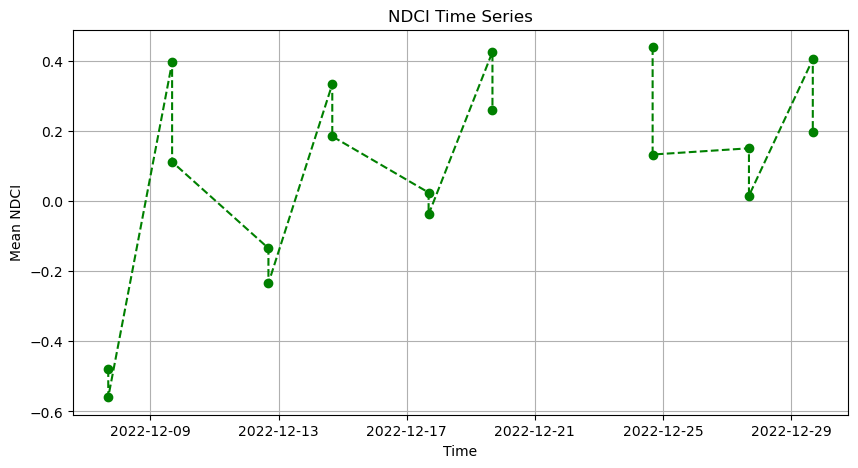

In [6]:
# Compute NDCI series
ndci_series = result["indices"]["NDCI"].compute()  # get actual values
time = result["indices"]["NDCI"].time.values      # get time coordinates

plt.figure(figsize=(10,5))
plt.plot(time, ndci_series, marker="o", linestyle="--", color="green")
plt.title("NDCI Time Series")
plt.xlabel("Time")
plt.ylabel("Mean NDCI")
plt.grid(True)
plt.show()


In [7]:
wqi_time_series(
    bbox=bbox,
    start_date=START_DATE,
    end_date=END_DATE,
    filter_clouds=True,          
)

AssertionError: out_bounds=None

In [ ]:
main(
    bbox=bbox,
    start_date=START_DATE,
    end_date=END_DATE,
    filter_clouds=False,
)

In [11]:
from pystac_client import Client

client = Client.open("https://earth-search.aws.element84.com/v1")
items = client.search(
    collections=["sentinel-2-l2a"],
    bbox=bbox,
    datetime=f"{START_DATE}/{END_DATE}",
    max_items=500
).item_collection()

print("Number of items found:", len(items))


Number of items found: 500


In [5]:
wqi_dict = wqi(
    bbox=bbox,
    start_date=START_DATE,
    end_date=END_DATE,
    filter_clouds=True,          
)

AssertionError: out_bounds=None